In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
installs = pd.read_csv("data/installs.csv")
''', dtype={'auction_type_id': 'float64', 'country': 'int64', 'date': 'str',
                                                   'device_id': 'int64', 'platform':'int64', 'ref_type_id': 'int64',
                                                   'source_id':'int64'}, parse_dates = ['date'])'''
installs.drop('click_hash', axis=1, inplace = True)
installs.drop('attributed', axis=1, inplace = True)
installs.head(5)

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [3]:
installs.dtypes

created                object
application_id          int64
ref_type                int64
ref_hash                int64
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

In [8]:
installs.describe()

,application_id,ref_type,ref_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,3412.000000,3.412000e+03,3.412000e+03,3.412000e+03,1.047000e+03,3.411000e+03,3.412000e+03,3.378000e+03
mean,10.247655,1.736533e+18,4.598202e+18,4.764401e+18,1.877864e+18,4.245276e+18,4.562040e+18,4.915828e+18
std,6.016194,1.936976e+17,2.663828e+18,1.678051e+18,1.886461e+18,2.620844e+18,2.683422e+18,2.477019e+18
min,0.000000,1.494519e+18,4.958527e+15,2.970471e+18,3.083059e+17,5.112505e+16,7.118754e+15,1.101539e+17
25%,7.000000,1.494519e+18,2.268353e+18,2.970471e+18,3.083059e+17,2.331947e+18,2.249197e+18,3.301378e+18
50%,9.000000,1.891515e+18,4.603807e+18,6.333597e+18,2.208835e+18,2.983638e+18,4.436113e+18,3.301378e+18
75%,10.000000,1.891515e+18,6.912404e+18,6.333597e+18,2.523246e+18,6.882415e+18,7.017564e+18,6.977049e+18
max,36.000000,1.891515e+18,9.218934e+18,6.333597e+18,9.169527e+18,9.222450e+18,9.221950e+18,9.028383e+18


In [15]:
installs['device_language'].value_counts()

3.301378e+18    1484
9.028383e+18     714
4.621024e+18     632
6.977049e+18     238
4.077062e+17      70
1.526421e+18      56
4.060930e+18      48
2.822843e+17      39
6.035180e+18      24
1.193279e+18      21
6.535228e+18      10
1.101539e+17       9
3.177265e+18       5
3.695787e+17       5
3.095856e+18       4
6.569908e+18       2
5.846217e+18       2
7.774316e+18       2
4.594650e+18       2
6.782349e+18       1
5.061642e+18       1
1.686906e+18       1
5.794427e+17       1
2.488366e+18       1
3.544544e+18       1
3.074904e+18       1
2.061937e+18       1
4.073835e+18       1
6.846873e+18       1
7.045130e+18       1
Name: device_language, dtype: int64

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


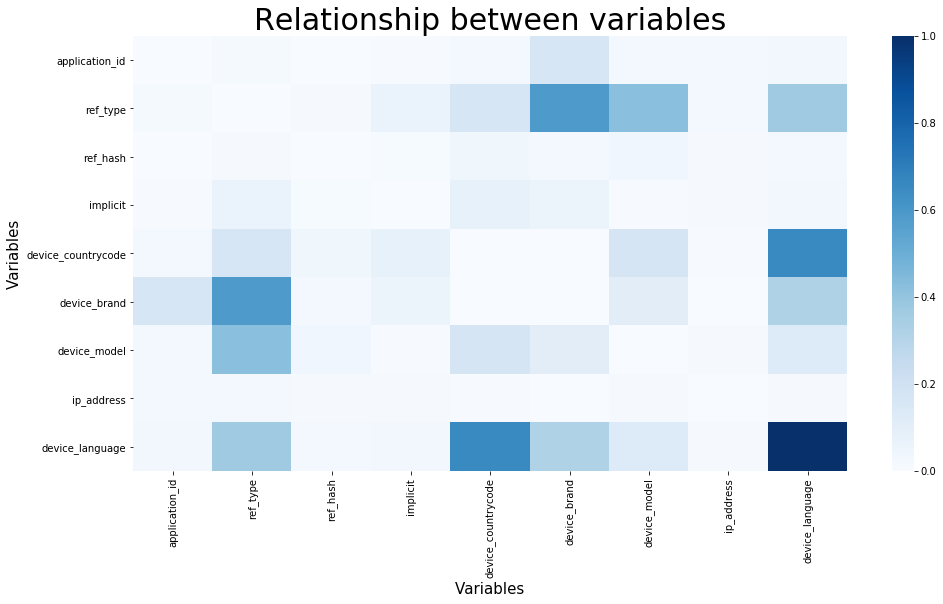

In [6]:
fig, ax = plt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = installs.corr().abs()
cor.values[[np.arange(8)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)